In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
df= pd.read_csv("Height-Weight Data.csv")
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [2]:
df.shape

(3501, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [4]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [5]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [6]:
x = df[["Height"]]
y = df["Weight"]

Text(0, 0.5, 'Weight')

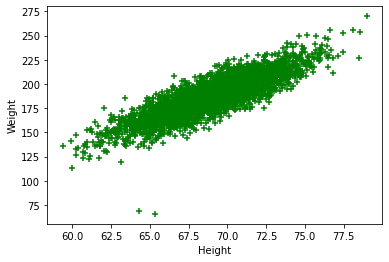

In [7]:
plt.scatter(df["Height"], df["Weight"],marker = "+", color = "Green")
plt.xlabel("Height")
plt.ylabel("Weight")

In [8]:
df.Height.mean()

69.02441087268797

In [9]:
df.Weight.mean()

186.89125797946284

In [10]:
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [11]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= .30, random_state=1)

In [13]:
xtrain

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [14]:
ytrain

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
           ...    
2763    186.208566
905     175.093255
1096    224.440459
235     198.460249
1061    192.307027
Name: Weight, Length: 2450, dtype: float64

In [15]:
xtest

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902
...,...
236,69.867101
1125,70.280692
1008,72.837685
2169,67.675148


In [16]:
ytest

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
236     185.716910
1125    187.258692
1008    212.204040
2169    193.586535
270     200.202829
Name: Weight, Length: 1051, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [20]:
m=reg.coef_

In [21]:
c=reg.intercept_
c

-225.82603000755844

In [22]:
x1 = 74.110105
y = m * x1 + c

In [23]:
y

array([217.16337723])

In [24]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [25]:
reg.predict([[74.110105]])

array([217.16337723])

In [26]:
df['Predicted Values'] = reg.predict(x)

In [27]:
df.head(10)

,Height,Weight,Predicted Values
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
5,67.253016,152.212156,176.175472
6,68.785081,183.927889,185.333317
7,68.348516,167.971111,182.723767
8,67.018950,175.929440,174.776355
9,63.456494,156.399676,153.481956


In [28]:
reg.score(xtest , ytest)

0.7313258168853622

In [29]:
reg.score(xtrain , ytrain)

0.7327243206606744

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(df.Height, df['Predicted Values'] ) #Total
mse

14064.977814826583

In [32]:
pred = reg.predict(xtest)
pred

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [33]:
mse = mean_squared_error(ytest, pred) #Testing Error
mse

110.89221516932378

In [35]:
pred2 = reg.predict(xtrain)
pred2

array([173.38945227, 163.86100911, 182.97238866, ..., 228.45987235,
       195.91437382, 194.20551648])

In [36]:
mse = mean_squared_error(ytrain, pred2) #training error
mse

103.91701705613012